In [3]:
#ORIGINAL CODE FROM LECTURE NOTES

import torch
import torch.optim as optim

# Training data
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

# Normalize the input 
t_un = 0.1 * t_u

def model(t_u, w, b):
    return w * t_u + b

def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

params = torch.tensor([1.0, 0.0], requires_grad=True)
optimizer = optim.Adam([params], lr=1e-2)

n_epochs = 5000
for epoch in range(n_epochs):
    t_p = model(t_un, *params)
    loss = loss_fn(t_p, t_c)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch % 500 == 0:
        print(f'Epoch {epoch}, Loss {loss.item():.4f}')

print(f'\nFinal Parameters: w={params[0].item():.4f}, b={params[1].item():.4f}')

Epoch 0, Loss 80.3643
Epoch 500, Loss 24.9258
Epoch 1000, Loss 15.7372
Epoch 1500, Loss 9.4454
Epoch 2000, Loss 5.7623
Epoch 2500, Loss 3.9305
Epoch 3000, Loss 3.1960
Epoch 3500, Loss 2.9770
Epoch 4000, Loss 2.9332
Epoch 4500, Loss 2.9280

Final Parameters: w=5.3660, b=-17.2952



Training with learning rate: 0.1
Epoch 0, Loss 183.7949
Epoch 500, Loss 2.0907
Epoch 1000, Loss 2.0907
Epoch 1500, Loss 2.0907
Epoch 2000, Loss 2.0907
Epoch 2500, Loss 2.0907
Epoch 3000, Loss 2.0907
Epoch 3500, Loss 2.0907
Epoch 4000, Loss 2.0907
Epoch 4500, Loss 2.0907
Final parameters: w2=0.8019, w1=9.1033, b=9.7710

Training with learning rate: 0.01
Epoch 0, Loss 183.7949
Epoch 500, Loss 44.1960
Epoch 1000, Loss 12.4033
Epoch 1500, Loss 3.9486
Epoch 2000, Loss 2.3267
Epoch 2500, Loss 2.1083
Epoch 3000, Loss 2.0913
Epoch 3500, Loss 2.0907
Epoch 4000, Loss 2.0907
Epoch 4500, Loss 2.0907
Final parameters: w2=0.8019, w1=9.1034, b=9.7710

Training with learning rate: 0.001
Epoch 0, Loss 183.7949
Epoch 500, Loss 157.5642
Epoch 1000, Loss 135.0377
Epoch 1500, Loss 115.7226
Epoch 2000, Loss 99.2051
Epoch 2500, Loss 85.1278
Epoch 3000, Loss 73.1675
Epoch 3500, Loss 63.0144
Epoch 4000, Loss 54.3578
Epoch 4500, Loss 46.8837
Final parameters: w2=3.0189, w1=4.6637, b=4.2439

Training with learn

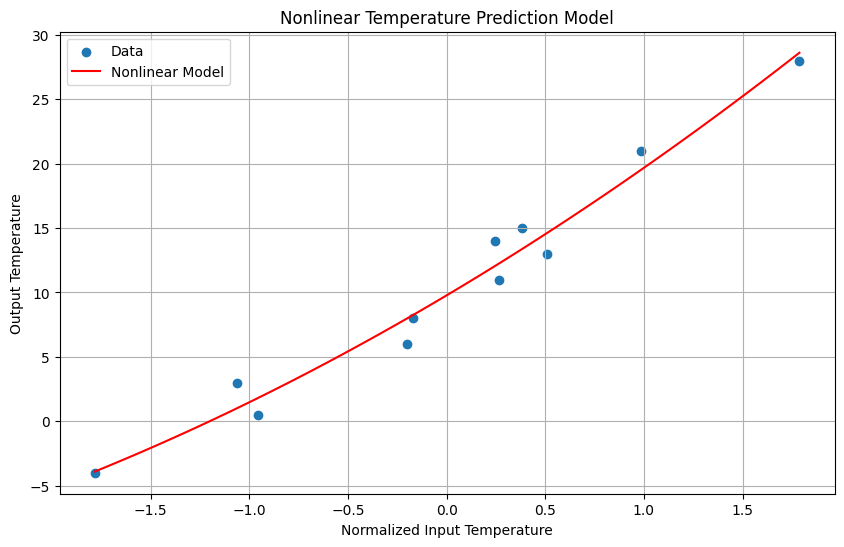


Best learning rate: 0.1
Best final loss: 2.0907


In [7]:
##Problem 1
#1a and 1b

import torch
import torch.optim as optim
import matplotlib.pyplot as plt

# Training data
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c, dtype=torch.float)
t_u = torch.tensor(t_u, dtype=torch.float)

# Normalize input
t_un = (t_u - torch.mean(t_u)) / torch.std(t_u)

def model(t_u, w2, w1, b):
    return w2 * t_u**2 + w1 * t_u + b

def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

learning_rates = [0.1, 0.01, 0.001, 0.0001]
final_losses = []
all_params = []

for lr in learning_rates:
    params = torch.tensor([0.1, 0.1, 0.0], requires_grad=True)
    optimizer = optim.Adam([params], lr=lr)
    
    print(f"\nTraining with learning rate: {lr}")
    for epoch in range(5000):
        t_p = model(t_un, *params)
        loss = loss_fn(t_p, t_c)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if epoch % 500 == 0:
            print(f'Epoch {epoch}, Loss {loss.item():.4f}')
    
    final_losses.append(loss.item())
    all_params.append(params.detach().clone())
    print(f'Final parameters: w2={params[0].item():.4f}, w1={params[1].item():.4f}, b={params[2].item():.4f}')

# Find best model
best_lr_index = final_losses.index(min(final_losses))
best_params = all_params[best_lr_index]

# Plot results
plt.figure(figsize=(10, 6))
t_u_range = torch.linspace(min(t_un), max(t_un), 100)
predictions = model(t_u_range, *best_params)

plt.scatter(t_un.numpy(), t_c.numpy(), label='Data')
plt.plot(t_u_range.numpy(), predictions.detach().numpy(), 'r-', label='Nonlinear Model')
plt.xlabel('Normalized Input Temperature')
plt.ylabel('Output Temperature')
plt.legend()
plt.title('Nonlinear Temperature Prediction Model')
plt.grid(True)
plt.show()

print(f"\nBest learning rate: {learning_rates[best_lr_index]}")
print(f"Best final loss: {min(final_losses):.4f}")

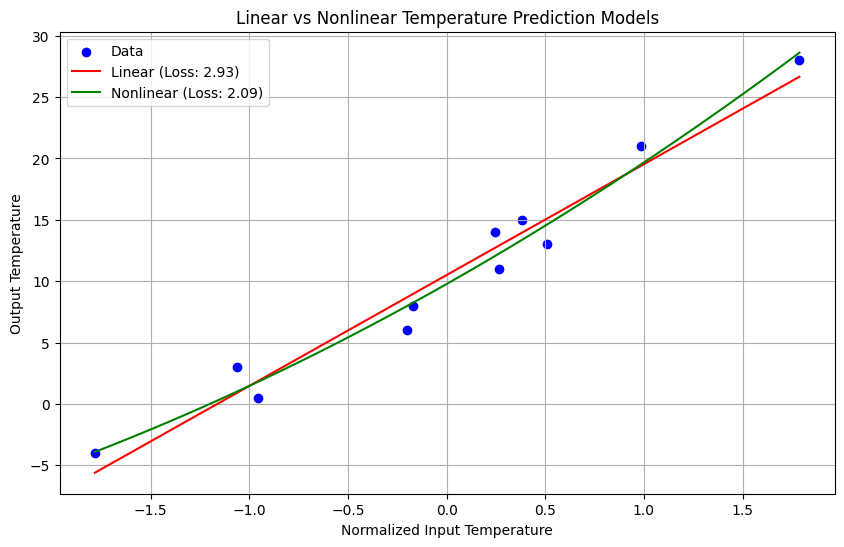


Linear Model Final Loss: 2.9276
Nonlinear Model Final Loss: 2.0907
Improvement: 28.59%


In [10]:
## Problem 1 
## 1c

import torch
import torch.optim as optim
import matplotlib.pyplot as plt

# Training data
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c, dtype=torch.float)
t_u = torch.tensor(t_u, dtype=torch.float)

# Normalize input
t_un = (t_u - torch.mean(t_u)) / torch.std(t_u)

# Linear model
def linear_model(t_u, w, b):
    return w * t_u + b

# Nonlinear model
def nonlinear_model(t_u, w2, w1, b):
    return w2 * t_u**2 + w1 * t_u + b

def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

# Train linear model
linear_params = torch.tensor([0.1, 0.0], requires_grad=True)
linear_optimizer = optim.Adam([linear_params], lr=0.01)

for epoch in range(5000):
    t_p = linear_model(t_un, *linear_params)
    loss = loss_fn(t_p, t_c)
    linear_optimizer.zero_grad()
    loss.backward()
    linear_optimizer.step()

linear_final_loss = loss.item()

# Train nonlinear model
nonlinear_params = torch.tensor([0.1, 0.1, 0.0], requires_grad=True)
nonlinear_optimizer = optim.Adam([nonlinear_params], lr=0.01)

for epoch in range(5000):
    t_p = nonlinear_model(t_un, *nonlinear_params)
    loss = loss_fn(t_p, t_c)
    nonlinear_optimizer.zero_grad()
    loss.backward()
    nonlinear_optimizer.step()

nonlinear_final_loss = loss.item()

# Plotting
plt.figure(figsize=(10, 6))
t_u_range = torch.linspace(min(t_un), max(t_un), 100)

# Plot data points
plt.scatter(t_un.numpy(), t_c.numpy(), label='Data', color='blue')

# Plot linear model predictions
linear_predictions = linear_model(t_u_range, *linear_params.detach())
plt.plot(t_u_range.numpy(), linear_predictions.numpy(), 'r-', label=f'Linear (Loss: {linear_final_loss:.2f})')

# Plot nonlinear model predictions
nonlinear_predictions = nonlinear_model(t_u_range, *nonlinear_params.detach())
plt.plot(t_u_range.numpy(), nonlinear_predictions.numpy(), 'g-', label=f'Nonlinear (Loss: {nonlinear_final_loss:.2f})')

plt.xlabel('Normalized Input Temperature')
plt.ylabel('Output Temperature')
plt.legend()
plt.title('Linear vs Nonlinear Temperature Prediction Models')
plt.grid(True)
plt.show()

print(f"\nLinear Model Final Loss: {linear_final_loss:.4f}")
print(f"Nonlinear Model Final Loss: {nonlinear_final_loss:.4f}")
print(f"Improvement: {((linear_final_loss - nonlinear_final_loss) / linear_final_loss * 100):.2f}%")

Epoch 0, Loss: 23.6618
Epoch 500, Loss: 1.3500
Epoch 1000, Loss: 1.3500
Epoch 1500, Loss: 1.3500
Epoch 2000, Loss: 1.3500
Epoch 2500, Loss: 1.3500
Epoch 3000, Loss: 1.3500
Epoch 3500, Loss: 1.3500
Epoch 4000, Loss: 1.3500
Epoch 4500, Loss: 1.3500
Epoch 0, Loss: 25.7232
Epoch 500, Loss: 1.3500
Epoch 1000, Loss: 1.3500
Epoch 1500, Loss: 1.3500
Epoch 2000, Loss: 1.3500
Epoch 2500, Loss: 1.3500
Epoch 3000, Loss: 1.3500
Epoch 3500, Loss: 1.3500
Epoch 4000, Loss: 1.3500
Epoch 4500, Loss: 1.3500
Epoch 0, Loss: 27.0583
Epoch 500, Loss: 4.8386
Epoch 1000, Loss: 1.8445
Epoch 1500, Loss: 1.4244
Epoch 2000, Loss: 1.3625
Epoch 2500, Loss: 1.3524
Epoch 3000, Loss: 1.3506
Epoch 3500, Loss: 1.3502
Epoch 4000, Loss: 1.3501
Epoch 4500, Loss: 1.3500
Epoch 0, Loss: 23.3274
Epoch 500, Loss: 19.1591
Epoch 1000, Loss: 15.8106
Epoch 1500, Loss: 13.1122
Epoch 2000, Loss: 10.9317
Epoch 2500, Loss: 9.1656
Epoch 3000, Loss: 7.7323
Epoch 3500, Loss: 6.5671
Epoch 4000, Loss: 5.6183
Epoch 4500, Loss: 4.8448


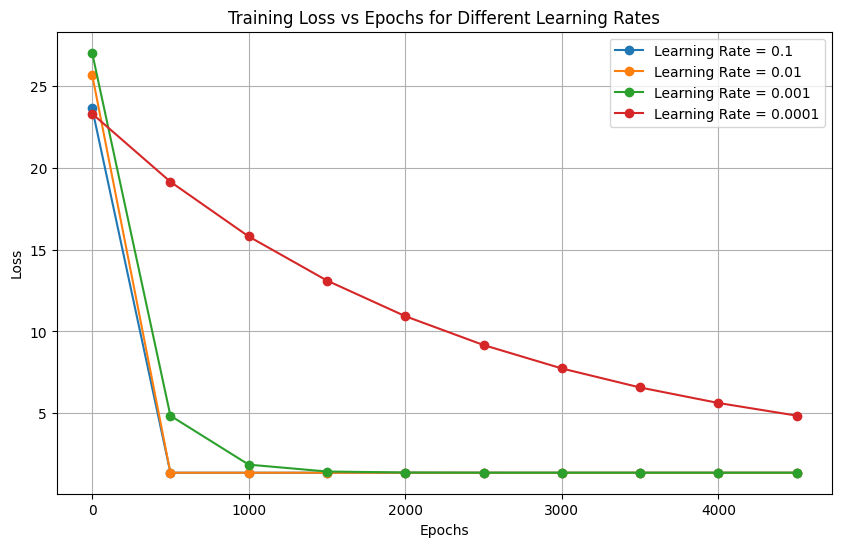

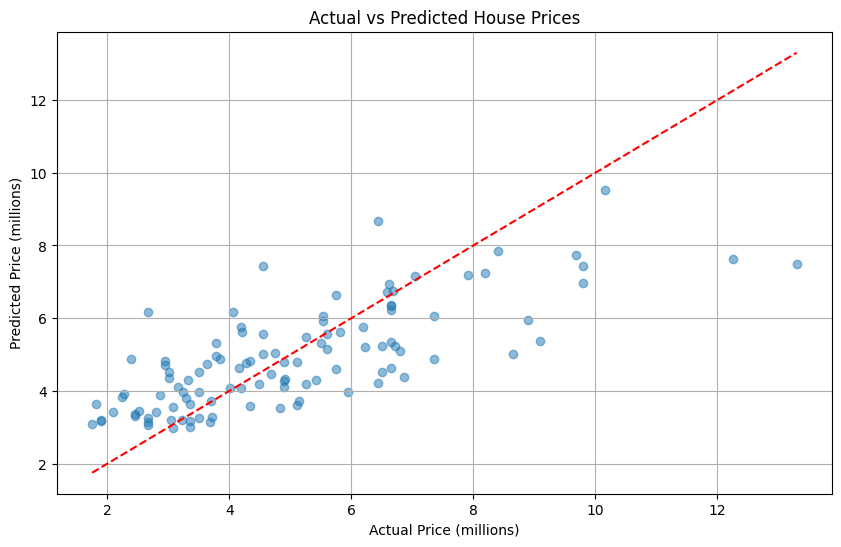

In [17]:
import torch
import torch.optim as optim
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load and preprocess data
data = pd.read_csv('assets/Housing.csv')
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
X = data[features]
y = data['price'] / 1e6  # Convert to millions for better scaling

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to tensors
X_train_tensor = torch.FloatTensor(X_train_scaled)
y_train_tensor = torch.FloatTensor(y_train.values)
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_test_tensor = torch.FloatTensor(y_test.values)

class LinearRegression(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = torch.nn.Linear(5, 1)
    
    def forward(self, x):
        return self.linear(x)

# Training function with loss tracking
def train_and_plot(learning_rate):
    model = LinearRegression()
    criterion = torch.nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)
    
    train_losses = []
    epochs = []
    
    for epoch in range(5000):
        optimizer.zero_grad()
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor.reshape(-1, 1))
        loss.backward()
        optimizer.step()
        
        if epoch % 500 == 0:
            epochs.append(epoch)
            train_losses.append(loss.item())
            print(f'Epoch {epoch}, Loss: {loss.item():.4f}')
    
    return epochs, train_losses, model

# Plot training curves for different learning rates
plt.figure(figsize=(10, 6))
learning_rates = [0.1, 0.01, 0.001, 0.0001]
best_loss = float('inf')
best_model = None

for lr in learning_rates:
    epochs, losses, model = train_and_plot(lr)
    plt.plot(epochs, losses, marker='o', label=f'Learning Rate = {lr}')
    if losses[-1] < best_loss:
        best_loss = losses[-1]
        best_model = model

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss vs Epochs for Different Learning Rates')
plt.legend()
plt.grid(True)
plt.show()

# Plot actual vs predicted prices
with torch.no_grad():
    y_pred = best_model(X_test_tensor)
    
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred.numpy(), alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price (millions)')
plt.ylabel('Predicted Price (millions)')
plt.title('Actual vs Predicted House Prices')
plt.grid(True)
plt.show()


Training with learning rate: 0.1
Epoch 500:
Training Loss: 0.437832
Validation Loss: 0.743571
Epoch 1000:
Training Loss: 0.437832
Validation Loss: 0.743571
Epoch 1500:
Training Loss: 0.437832
Validation Loss: 0.743571
Epoch 2000:
Training Loss: 0.437832
Validation Loss: 0.743571
Epoch 2500:
Training Loss: 0.437832
Validation Loss: 0.743571
Epoch 3000:
Training Loss: 0.437832
Validation Loss: 0.743571
Epoch 3500:
Training Loss: 0.437832
Validation Loss: 0.743571
Epoch 4000:
Training Loss: 0.437832
Validation Loss: 0.743571
Epoch 4500:
Training Loss: 0.437832
Validation Loss: 0.743571
Epoch 5000:
Training Loss: 0.437832
Validation Loss: 0.743571

Training with learning rate: 0.01
Epoch 500:
Training Loss: 0.437834
Validation Loss: 0.743727
Epoch 1000:
Training Loss: 0.437832
Validation Loss: 0.743571
Epoch 1500:
Training Loss: 0.437832
Validation Loss: 0.743571
Epoch 2000:
Training Loss: 0.437832
Validation Loss: 0.743571
Epoch 2500:
Training Loss: 0.437832
Validation Loss: 0.743571
Epo

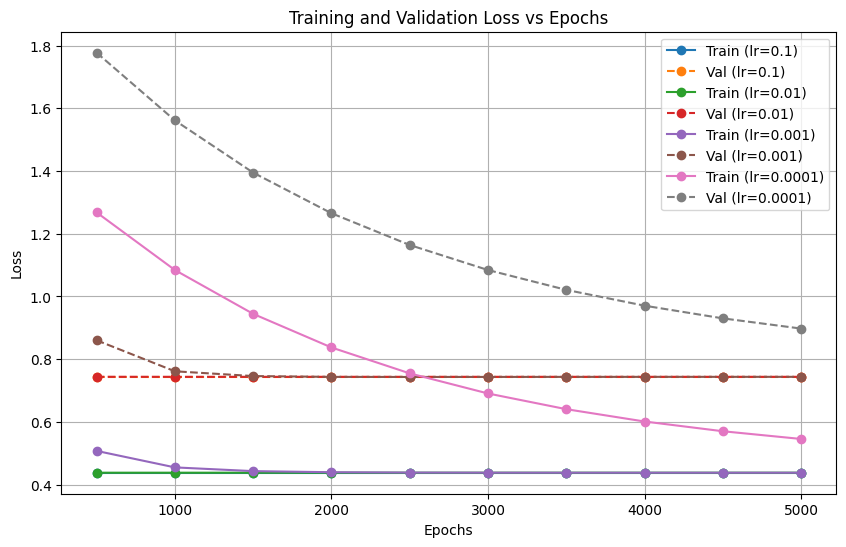

In [4]:
##Problem 2
## 2a 2b 2c

import torch
import torch.optim as optim
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load and preprocess data
data = pd.read_csv('assets/Housing.csv')
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
X = data[features]
y = data['price']

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

# Convert to tensors
X_train_tensor = torch.FloatTensor(X_train_scaled)
y_train_tensor = torch.FloatTensor(y_train_scaled)
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_test_tensor = torch.FloatTensor(y_test_scaled)

class LinearRegression(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = torch.nn.Linear(5, 1)  # 5 features -> 1 output
    
    def forward(self, x):
        return self.linear(x)

def train_model(lr):
    model = LinearRegression()
    criterion = torch.nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)
    
    train_losses = []
    val_losses = []
    
    print(f"\nTraining with learning rate: {lr}")
    for epoch in range(5000):
        # Training
        model.train()
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor.reshape(-1, 1))
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Validation
        model.eval()
        with torch.no_grad():
            val_outputs = model(X_test_tensor)
            val_loss = criterion(val_outputs, y_test_tensor.reshape(-1, 1))
        
        if (epoch + 1) % 500 == 0:
            print(f'Epoch {epoch+1}:')
            print(f'Training Loss: {loss.item():.6f}')
            print(f'Validation Loss: {val_loss.item():.6f}')
            train_losses.append(loss.item())
            val_losses.append(val_loss.item())
    
    return model, train_losses, val_losses

# Train with different learning rates
learning_rates = [0.1, 0.01, 0.001, 0.0001]
all_models = []
all_train_losses = []
all_val_losses = []

for lr in learning_rates:
    model, train_losses, val_losses = train_model(lr)
    all_models.append(model)
    all_train_losses.append(train_losses)
    all_val_losses.append(val_losses)

# Find best model
best_model_idx = np.argmin([losses[-1] for losses in all_val_losses])
best_model = all_models[best_model_idx]
best_lr = learning_rates[best_model_idx]

print("\nBest Model Parameters:")
for name, param in best_model.named_parameters():
    if name == 'linear.weight':
        print("\nFeature weights:")
        for feature, weight in zip(features, param.data.numpy().flatten()):
            print(f"{feature}: {weight:.6f}")
    elif name == 'linear.bias':
        print(f"\nBias: {param.data.numpy()[0]:.6f}")

print(f"\nBest learning rate: {best_lr}")
print(f"Final validation loss: {all_val_losses[best_model_idx][-1]:.6f}")

# Plot training curves
plt.figure(figsize=(10, 6))
epochs = np.arange(500, 5001, 500)
for i, lr in enumerate(learning_rates):
    plt.plot(epochs, all_train_losses[i], label=f'Train (lr={lr})', marker='o')
    plt.plot(epochs, all_val_losses[i], label=f'Val (lr={lr})', marker='o', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss vs Epochs')
plt.legend()
plt.grid(True)
plt.show()


Training with learning rate: 0.1
Epoch 500:
Training Loss: 0.314557
Validation Loss: 0.574611
Epoch 1000:
Training Loss: 0.314557
Validation Loss: 0.574611
Epoch 1500:
Training Loss: 0.314557
Validation Loss: 0.574611
Epoch 2000:
Training Loss: 0.314557
Validation Loss: 0.574611
Epoch 2500:
Training Loss: 0.314557
Validation Loss: 0.574611
Epoch 3000:
Training Loss: 0.314557
Validation Loss: 0.574611
Epoch 3500:
Training Loss: 0.314557
Validation Loss: 0.574611
Epoch 4000:
Training Loss: 0.314557
Validation Loss: 0.574611
Epoch 4500:
Training Loss: 0.314557
Validation Loss: 0.574611
Epoch 5000:
Training Loss: 0.314557
Validation Loss: 0.574611

Training with learning rate: 0.01
Epoch 500:
Training Loss: 0.314575
Validation Loss: 0.574551
Epoch 1000:
Training Loss: 0.314557
Validation Loss: 0.574610
Epoch 1500:
Training Loss: 0.314557
Validation Loss: 0.574611
Epoch 2000:
Training Loss: 0.314557
Validation Loss: 0.574611
Epoch 2500:
Training Loss: 0.314557
Validation Loss: 0.574611
Epo

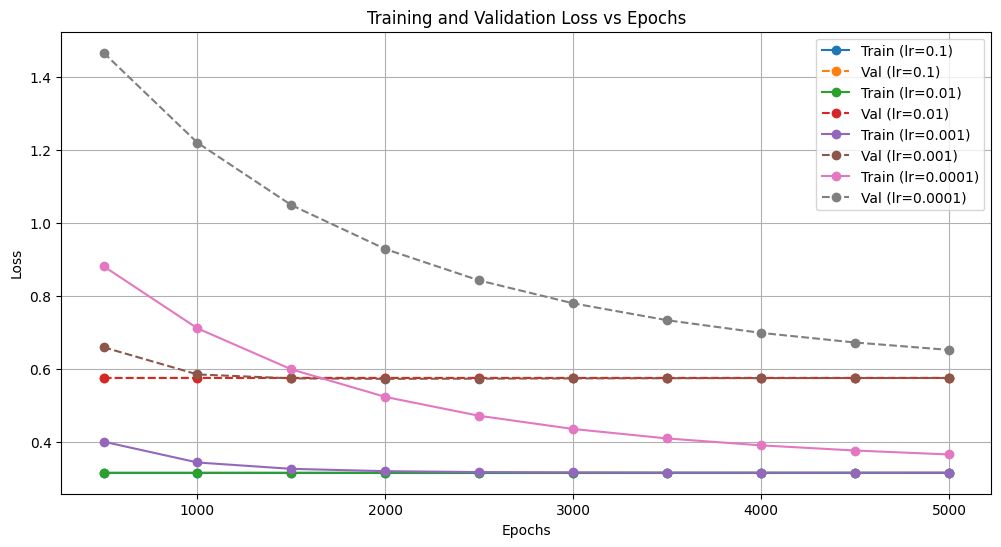

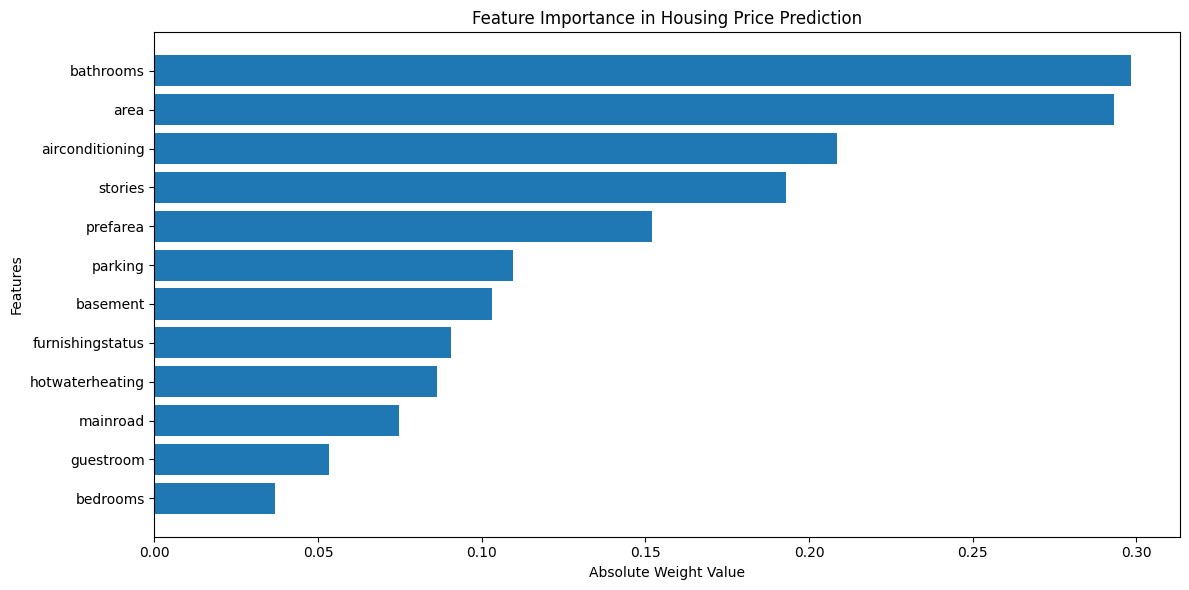

In [7]:
##PROBLEM 3

import torch
import torch.optim as optim
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('assets/Housing.csv')

# Convert categorical variables to numeric
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 
                      'airconditioning', 'prefarea', 'furnishingstatus']
label_encoders = {}

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Prepare features and target
X = data.drop('price', axis=1)
y = data['price']

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

# Convert to tensors
X_train_tensor = torch.FloatTensor(X_train_scaled)
y_train_tensor = torch.FloatTensor(y_train_scaled)
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_test_tensor = torch.FloatTensor(y_test_scaled)

class LinearRegression(torch.nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.linear = torch.nn.Linear(input_size, 1)
    
    def forward(self, x):
        return self.linear(x)

def train_model(lr):
    model = LinearRegression(X_train.shape[1])
    criterion = torch.nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)
    
    train_losses = []
    val_losses = []
    
    print(f"\nTraining with learning rate: {lr}")
    for epoch in range(5000):
        # Training
        model.train()
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor.reshape(-1, 1))
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Validation
        model.eval()
        with torch.no_grad():
            val_outputs = model(X_test_tensor)
            val_loss = criterion(val_outputs, y_test_tensor.reshape(-1, 1))
        
        if (epoch + 1) % 500 == 0:
            print(f'Epoch {epoch+1}:')
            print(f'Training Loss: {loss.item():.6f}')
            print(f'Validation Loss: {val_loss.item():.6f}')
            train_losses.append(loss.item())
            val_losses.append(val_loss.item())
    
    return model, train_losses, val_losses

# Train with different learning rates
learning_rates = [0.1, 0.01, 0.001, 0.0001]
all_models = []
all_train_losses = []
all_val_losses = []

for lr in learning_rates:
    model, train_losses, val_losses = train_model(lr)
    all_models.append(model)
    all_train_losses.append(train_losses)
    all_val_losses.append(val_losses)

# Find best model
best_model_idx = np.argmin([losses[-1] for losses in all_val_losses])
best_model = all_models[best_model_idx]
best_lr = learning_rates[best_model_idx]

print("\nBest Model Parameters:")
for name, param in best_model.named_parameters():
    if name == 'linear.weight':
        print("\nFeature weights:")
        for feature, weight in zip(X_train.columns, param.data.numpy().flatten()):
            print(f"{feature}: {weight:.6f}")
    elif name == 'linear.bias':
        print(f"\nBias: {param.data.numpy()[0]:.6f}")

print(f"\nBest learning rate: {best_lr}")
print(f"Final validation loss: {all_val_losses[best_model_idx][-1]:.6f}")

# Plot training curves
plt.figure(figsize=(12, 6))
epochs = np.arange(500, 5001, 500)
for i, lr in enumerate(learning_rates):
    plt.plot(epochs, all_train_losses[i], label=f'Train (lr={lr})', marker='o')
    plt.plot(epochs, all_val_losses[i], label=f'Val (lr={lr})', marker='o', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss vs Epochs')
plt.legend()
plt.grid(True)
plt.show()

# Plot feature importance
plt.figure(figsize=(12, 6))
weights = best_model.linear.weight.data.numpy().flatten()
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Weight': np.abs(weights)
}).sort_values('Weight', ascending=True)

plt.barh(feature_importance['Feature'], feature_importance['Weight'])
plt.xlabel('Absolute Weight Value')
plt.ylabel('Features')
plt.title('Feature Importance in Housing Price Prediction')
plt.tight_layout()
plt.show()